In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'givenby_gemini.ipynb',
 'givenby_grok.ipynb',
 'Heart_attack.ipynb']

In [3]:
os.chdir(r"E:\Project\Material\Training_Set\Training_Set")

In [4]:
os.listdir()


['RFMiD_Training_Labels.csv', 'Training']

In [5]:
df = pd.read_csv("RFMiD_Training_Labels.csv")
df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df["ID"] = df["ID"].astype(str) + ".png"

In [7]:
image_files = os.listdir("Training/")
image_folder="Training/"

In [8]:
# Function to show images with labels
def show_sample_images(num=5):
    image_files = os.listdir("Training/")[:num]
    image_folder="Training/"
    plt.figure(figsize=(12, 6))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_folder ,img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        
        # Extract label (ensure filenames match)
        label = "Unknown"
        matched_label = df[df["ID"] == img_file]
        if not matched_label.empty:
            label = matched_label.iloc[0,0]  # Use .iloc[0] to avoid errors

        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {label}")
    
    plt.show()


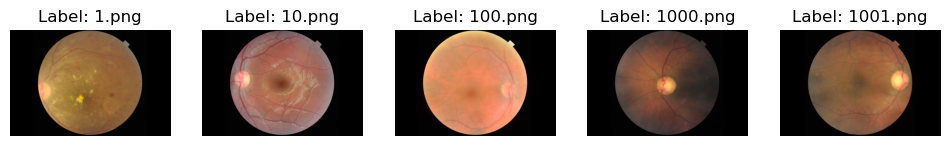

In [9]:
# Show sample images
show_sample_images(5)

In [10]:
# Function to load & resize images
def load_and_resize_images(image_folder, df, img_size=(224, 224)):
    images = []
    labels = []

    # Get list of label columns (excluding 'ID')
    label_columns = df.columns[1:]  # All columns except 'ID'

    for img_name in tqdm(df["ID"]):
        img_path = os.path.join(image_folder, img_name)
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize to 224x224
            img = img / 255.0  # Normalize pixels (0-1)
            
            images.append(img)
            # labels.append(df[df["ID"] == img_name].iloc[0, 1])  # Extract label
            
            # Extract multi-labels as a NumPy array
            label_values = df[df["ID"] == img_name][label_columns].values[0]
            labels.append(label_values)

    return np.array(images), np.array(labels)

In [11]:
# Load dataset
X_train, y_train = load_and_resize_images(image_folder, df)

print("Dataset Loaded!")
print("Shape of X (Images):", X_train.shape)
print("Shape of y (Labels):", y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 1920/1920 [02:36<00:00, 12.28it/s]


Dataset Loaded!
Shape of X (Images): (1919, 224, 224, 3)
Shape of y (Labels): (1919, 46)


In [12]:
test_image_folder = r"E:\Project\Material\Test_Set\Test_Set\Test"
# Load labels
test_df = pd.read_csv(r"E:\Project\Material\Test_Set\Test_Set\RFMiD_Testing_Labels.csv")
test_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_df["ID"] = test_df["ID"].astype(str) + ".png"

In [14]:
# Load test dataset
X_test, y_test = load_and_resize_images(test_image_folder, test_df)

print("Test Dataset Loaded!")
print("Shape of X_test (Images):", X_test.shape)
print("Shape of y_test (Labels):", y_test.shape)


100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:57<00:00, 11.23it/s]


Test Dataset Loaded!
Shape of X_test (Images): (640, 224, 224, 3)
Shape of y_test (Labels): (640, 46)


In [15]:
y_test

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [16]:
# Data Augmentation (Only for Training)
# train_datagen = ImageDataGenerator(
#     rotation_range=10,
#     horizontal_flip=True,
#     vertical_flip=True,
#     zoom_range=0.1,
#     brightness_range=[0.8, 1.2]
# )


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased from 30
    width_shift_range=0.3,  # Increased from 0.2
    height_shift_range=0.3,  # Increased from 0.2
    shear_range=0.2,
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)




# No augmentation for testing
test_datagen = ImageDataGenerator()

In [17]:
from sklearn.utils import shuffle

# Shuffle training dataset
df = shuffle(df, random_state=42).reset_index(drop=True)


In [18]:
# Generate augmented training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [19]:
train_generator

In [20]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Create CNN Model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Drop 25% of neurons

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Drop 30% of neurons

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer with L2 Regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5))  # Drop 50% of neurons

# Output Layer
model.add(Dense(46, activation='sigmoid'))  # Assuming 10 classes

# Compile Model
optimizer = Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,913,326 (91.22 MB)

 Trainable params: 23,913,326 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Define CNN Model
# model = Sequential([
#     # Convolutional Layers
#     Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(256, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(512, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     # Flatten before Dense Layers
#     Flatten(),

#     # Fully Connected Layers
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # Regularization
#     Dense(64, activation='relu'),
#     Dense(len(label_columns), activation='sigmoid')  # Multi-label classification
# ])

# # Compile Model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Since it's multi-label classification
#               metrics=['accuracy'])

# # Model Summary
# model.summary()


In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Flatten the labels into a single array
labels = np.array(y_train).flatten()

# Compute class weights for balancing
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

# Convert to dictionary format required for model.fit()
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [25]:
# Train Model
# history = model.fit(train_generator, 
#                     epochs=5, 
#                     validation_data=test_generator)

# Train the model with class weights
model.fit(train_generator, epochs=10,validation_data=test_generator, batch_size=32, class_weight=class_weight_dict, verbose=1)

# Save Model
model.save(r"E:/Project/Dataset/Code/retinal_cnn_model2.h5")


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.1487 - loss: 1.6848 - val_accuracy: 1.0000 - val_loss: 0.4201
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5486 - loss: 0.1775 - val_accuracy: 1.0000 - val_loss: 0.5357
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7132 - loss: 0.1227 - val_accuracy: 1.0000 - val_loss: 0.5652
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7655 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 0.6398
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8185 - loss: 0.0943 - val_accuracy: 1.0000 - val_loss: 0.5842
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8207 - loss: 0.0867 - val_accuracy: 1.0000 - val_loss: 0.6722
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8589 - loss: 0.0839 - val_accuracy: 1.0000 - val_loss: 0.5345
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8700 - loss: 0.0793 - val_accuracy: 1.0000 - val_loss: 0.

In [26]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 1.0000 - loss: 0.5322
Test Accuracy: 100.00%


In [27]:
from tensorflow.keras.models import load_model

# Load the saved CNN model
model = load_model("E:/Project/Dataset/Code/retinal_cnn_model2.h5")
print("Model Loaded Successfully!")


Model Loaded Successfully!


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define labels (Make sure they match the dataset columns)
label_columns = ["Disease_Risk", "DR", "ARMD", "MH", "DN", "MYA", "BRVO", "TSLN", "ERM", "LS"]

# Function to preprocess and predict image
def predict_image(image_path):
    img = cv2.imread(image_path)  # Load Image
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Reshape for model

    # Predict using CNN model
    predictions = model.predict(img)[0]

    # Create dictionary with predicted labels
    results = {label_columns[i]: round(predictions[i], 2) for i in range(len(label_columns))}
    
    # Display image & prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted Risk: {results['Disease_Risk']}")
    plt.show()
    
    return results


In [30]:
os.chdir(r"E:\Project\Material\Evaluation_Set\Evaluation_Set")

In [31]:
a=os.listdir()
a

['RFMiD_Validation_Labels.csv', 'Validation']

In [32]:
# image_path=filedialog.askopenfilename(title="Select image")
image_path=r"E:/imgg.jpg"
image_path

'E:/imgg.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


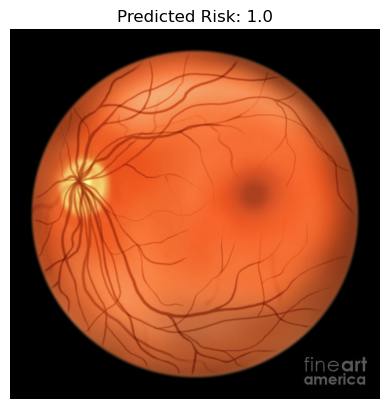

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}


In [33]:
if image_path:
    predic=predict_image(image_path)
    print("probability is : ",predic)

E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\12.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


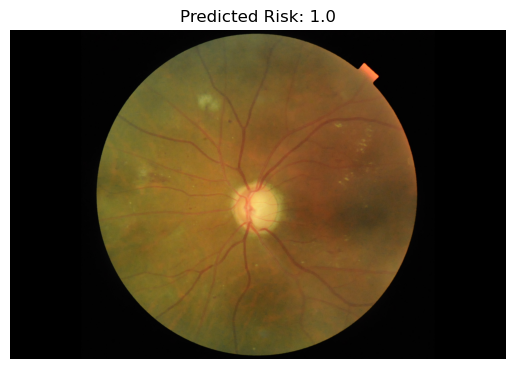

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\13.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


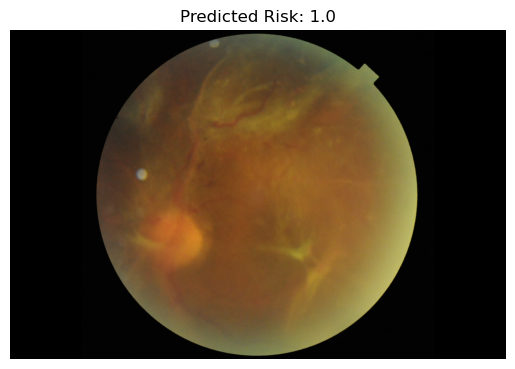

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\14.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


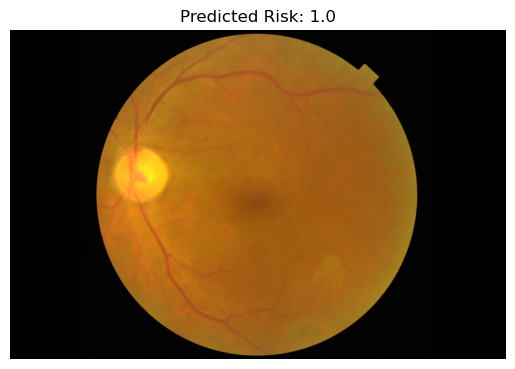

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\15.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


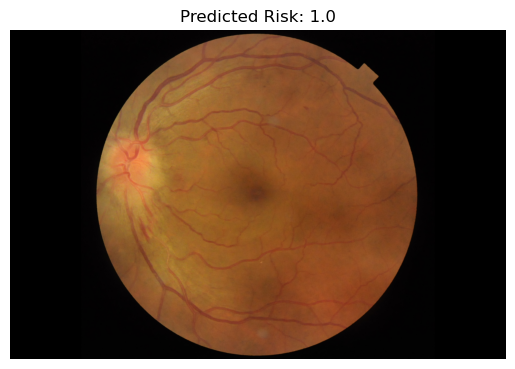

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\16.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


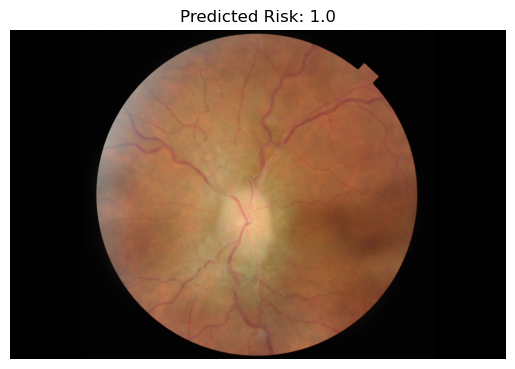

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\17.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


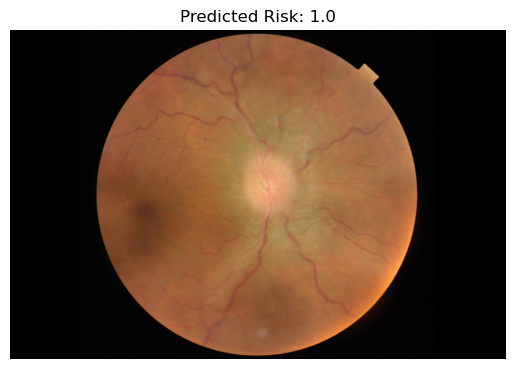

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\18.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


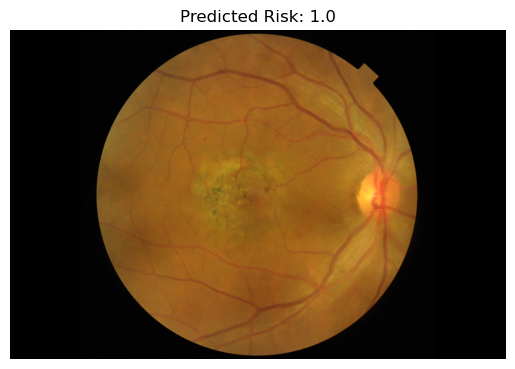

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\19.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


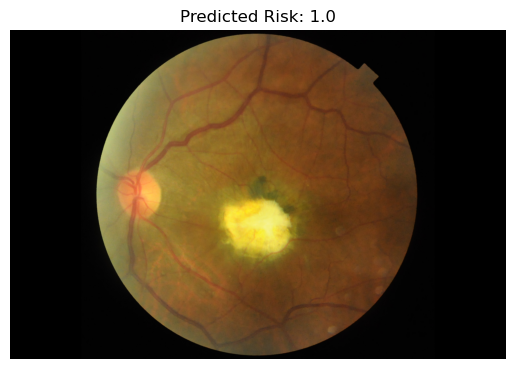

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\20.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


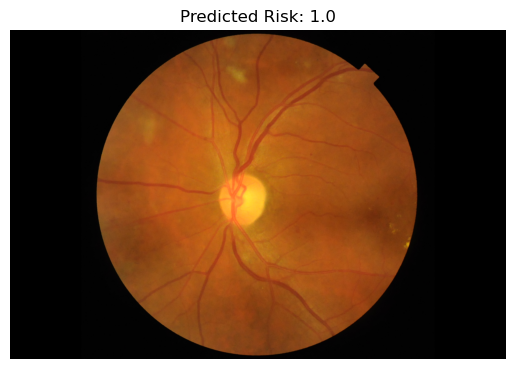

probability is :  {'Disease_Risk': 1.0, 'DR': 0.0, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}


In [34]:
# image_path=filedialog.askopenfilename(title="Select image")
for i in range(11,20):
    image_path=(f"E:\\Project\\Material\\Evaluation_Set\\Evaluation_Set\\Validation\\{i+1}.png")
    print(image_path)
    if image_path:
        predic=predict_image(image_path)
        print("probability is : ",predic)